<img width=200 src="https://www.smhi.se/polopoly_fs/1.135796.1527766089!/image/LoggaEUCP.png_gen/derivatives/Original_366px/image/LoggaEUCP.png"> <img width=200 src="https://zenodo.org/api/files/00000000-0000-0000-0000-000000000000/is-enes3/logo.png"> <img width=200 src="https://www.dtls.nl/wp-content/uploads/2015/03/NleSc.png"> <img width=200 src="https://www.dkrz.de/@@site-logo/dkrz.svg"> <img width=200 src="https://jupyter.org/assets/homepage/hublogo.svg"> <img width=200 src="https://docs.esmvaltool.org/en/v2.5.0/_static/ESMValTool-logo-2.png">

# The new Python API for ESMValTool

ESMValTool is a library of climate analysis workflows ("recipes"), as well as a tool to execute them. With the new Python API, this library is now also easily accessible in Jupyter environment. It allows you to easily run existing recipes as well as developing new ones. A very useful feature is that you can directly access all the output (data, images, etc) and further process them in the notebook.

In [1]:
# Import the tool
import esmvalcore.experimental as esmvaltool

### Inspect/modify settings

If you want, you can look at the configuration. Notice that there are some default data paths set to where CMIP data is stored on Mistral. 

In [2]:
esmvaltool.CFG

Config({'auxiliary_data_dir': PosixPath('/home/bandela/esmvaltool_extra_data'),
        'compress_netcdf': False,
        'config_developer_file': PosixPath('/home/bandela/.esmvaltool/config-developer.yml'),
        'config_file': PosixPath('/home/bandela/.esmvaltool/config-user.yml'),
        'download_dir': PosixPath('/home/bandela/climate_data'),
        'drs': {'CMIP3': 'ESGF',
                'CMIP5': 'ESGF',
                'CMIP6': 'ESGF',
                'CORDEX': 'ESGF',
                'obs4MIPs': 'ESGF'},
        'exit_on_warning': False,
        'extra_facets_dir': (),
        'log_level': 'info',
        'max_parallel_tasks': None,
        'offline': False,
        'output_dir': PosixPath('/home/bandela/esmvaltool_output'),
        'output_file_type': 'png',
        'profile_diagnostic': False,
        'remove_preproc_dir': False,
        'resume_from': [],
        'rootpath': {'OBS': [PosixPath('/home/bandela/esmvaltool_input/OBS')],
                     'OBS6': [PosixPat

The default settings should be okay for most use cases. However, should you wish to modify some settings, this is quite straightforward:

### See all the available ESMValTool recipes

In [3]:
all_recipes = esmvaltool.get_all_recipes()
all_recipes

[Recipe('Recipe kcs'),
 Recipe('Recipe smpi 4cds'),
 Recipe('Recipe spei'),
 Recipe('Recipe autoassess landsurface permafrost'),
 Recipe('Recipe smpi'),
 Recipe('Recipe zmnam'),
 Recipe('Recipe flato13ipcc'),
 Recipe('Recipe tcr'),
 Recipe('Recipe extreme events'),
 Recipe('Recipe modes of variability'),
 Recipe('Recipe li17natcc'),
 Recipe('Recipe capacity factor'),
 Recipe('Recipe autoassess stratosphere'),
 Recipe('Recipe miles block'),
 Recipe('Recipe williams09climdyn crem'),
 Recipe('Recipe autoassess landsurface soilmoisture'),
 Recipe('Recipe perfmetrics cmip5 4cds'),
 Recipe('Recipe carvalhais14nat'),
 Recipe('Recipe ecs'),
 Recipe('Recipe radiation budget'),
 Recipe('Recipe ocean landschuetzer2016'),
 Recipe('Recipe ocean ice extent'),
 Recipe('Recipe autoassess radiation rms cfmon all'),
 Recipe('Recipe autoassess radiation rms amon obs'),
 Recipe('Recipe esacci lst'),
 Recipe('Recipe combined indices'),
 Recipe('Recipe cvdp'),
 Recipe('Recipe climwip test performance sigma'

Here, we'll just run the example recipe. We can search through the available recipes and select it

In [4]:
examples = all_recipes.find("example")
examples

[Recipe('Recipe collins13ipcc'),
 Recipe('Recipe preprocessor derive test'),
 Recipe('Recipe python'),
 Recipe('Recipe r'),
 Recipe('Recipe preprocessor test'),
 Recipe('Recipe julia'),
 Recipe('Recipe my personal diagnostic'),
 Recipe('Recipe decadal'),
 Recipe('Recipe variable groups'),
 Recipe('Recipe extract shape'),
 Recipe('Recipe ncl'),
 Recipe('Recipe globwat')]

In [5]:
recipe_python = examples[2]
recipe_python

Recipe('Recipe python')

### Running the example recipe

Now that we've selected our recipe, we can just run it and inspect the output

In [6]:
output = recipe_python.run()

In [7]:
output

map/script1:
  DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc')
  ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png')
  ImageFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.png')
  DataFile('CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.nc')

timeseries/script1:
  DataFile('tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc')
  ImageFile('tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.png')
  DataFile('tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc')
  DataFile('tas_amsterdam_MultiModelMean_historical_Amon_tas_1850-2000.nc')
  DataFile('tas_global_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc')
  ImageFile('tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.png')
  ImageFile('tas_amsterdam_MultiModelMean_historical_Amon_tas_1850-2000.png')
  ImageFile('tas_amsterdam_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.png')
  ImageFile('tas_global_CMIP5

In [8]:
output['timeseries/script1'][2]

DataFile('tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc')

ImageFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png')
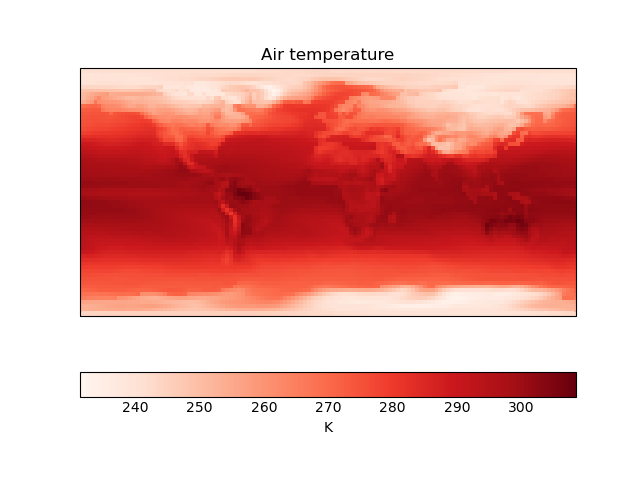

In [9]:
output['map/script1'][1]

In [10]:
output['map/script1'][0]

DataFile('CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc')

If the output is a dataset, you can load it with `xarray` or `iris`. In this way, you can immediately continue to work with the (pre-)processed data in your notebook.

In [11]:
xrds = output['map/script1'][0].load_xarray()
xrds

<xarray.Dataset>
Dimensions:       (lat: 64, lon: 128, bnds: 2)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon           (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    height        float64 2.0
    month_number  int64 1
    time          object 2000-01-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    tas           (lat, lon) float32 242.2 242.0 241.8 ... 243.8 244.0 244.1
    lat_bnds      (lat, bnds) float64 -90.0 -86.48 -86.48 ... 86.48 86.48 90.0
    lon_bnds      (lon, bnds) float64 -1.406 1.406 1.406 ... 355.8 355.8 358.6
    time_bnds     (bnds) object 2000-01-01 00:00:00 2000-02-01 00:00:00
Attributes: (12/32)
    CCCma_data_licence:     1) GRANT OF LICENCE - The Government of Canada (E...
    CCCma_parent_runid:     IGA
    CCCma_runid:            IGM
    associated_files:       baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLoc...
    branch_time:            171915.0
    branch_time_YMDH:       2321:01:01:00
    ...                     ...
    software:               Created with ESMValTool v2.5.0
    source:                 CanESM2 2010 atmosphere: CanAM4 (AGCM15i, T63L35)...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  CanESM2 model output prepared for CMIP5 historical
    Conventions:            CF-1.7
    caption:                Average Near-Surface Air Temperature between 2000...

In [12]:
cube = output['map/script1'][0].load_iris()[0]
print(cube)

AttributeError: 'ImageFile' object has no attribute 'load_iris'

In [ ]:
xrds.tas.plot(figsize=(15, 10))

### Final remarks

For more information on all available recipes, visit the [ESMValTool documentation](https://docs.esmvaltool.org/en/latest/recipes/index.html). If you're interested in more advanced use cases, please contact us, e.g. p.kalverla@esciencecenter.nl